In [39]:
import json
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [4]:
with open('./finalScripts/Mainnet/all_mainnet_dao_data_with_token_balances_and_wallet_totals.json', 'r') as j:
     mainnet_dao_data = json.loads(j.read())

In [41]:
wallet_vs_size_data = []
for dao in mainnet_dao_data:
    cur_data_point = []
    cur_data_point.append(len(dao['members']))
    cur_data_point.append(dao['wallet_total'])
    wallet_vs_size_data.append(cur_data_point)
    
wallet_vs_size_df = pd.DataFrame(wallet_vs_size_data, columns=['num_of_members', 'wallet_total'])

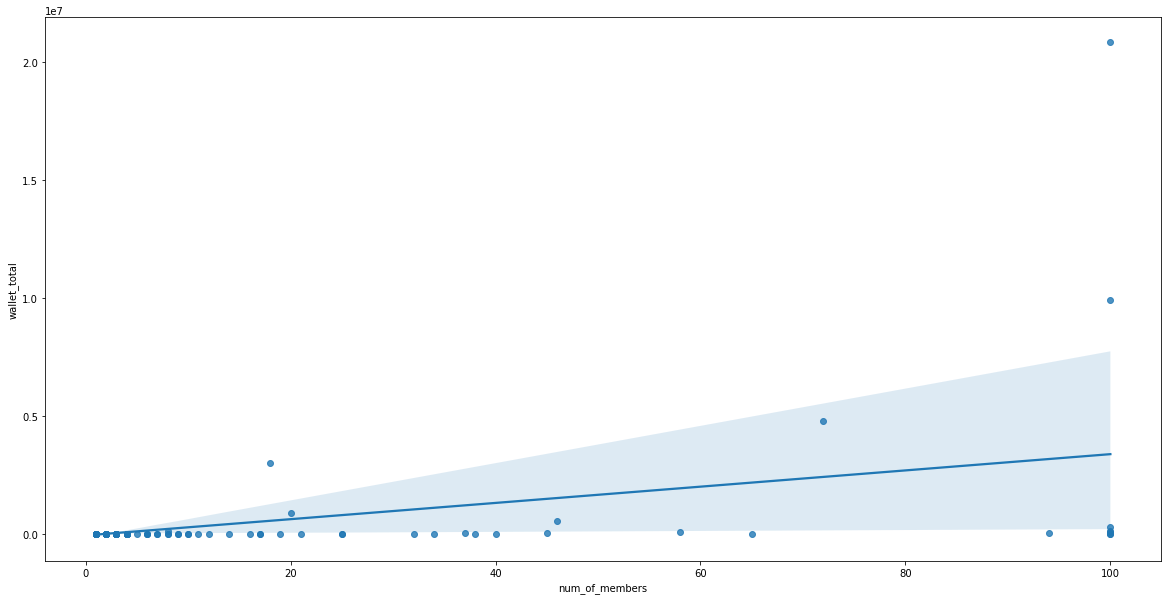

In [42]:
plt.figure(figsize=(20,10))
sns.regplot(x=wallet_vs_size_df['num_of_members'], y=wallet_vs_size_df['wallet_total'])
plt.show()

In [60]:
ether_amounts_vs_dao_total = []
for dao in mainnet_dao_data:
    cur_data_point = []
    amount = 0
    for token in dao["token_info"]:
        if (token["symbol"] == "ETH") | (token["symbol"] == "WETH"):
            amount += float(token["balance"])
    
    cur_data_point.append(amount)
    cur_data_point.append(dao['wallet_total'])
    ether_amounts_vs_dao_total.append(cur_data_point)
    
ether_amount_vs_wallet_total_df = pd.DataFrame(ether_amounts_vs_dao_total, columns=['ether_balance', 'wallet_total'])

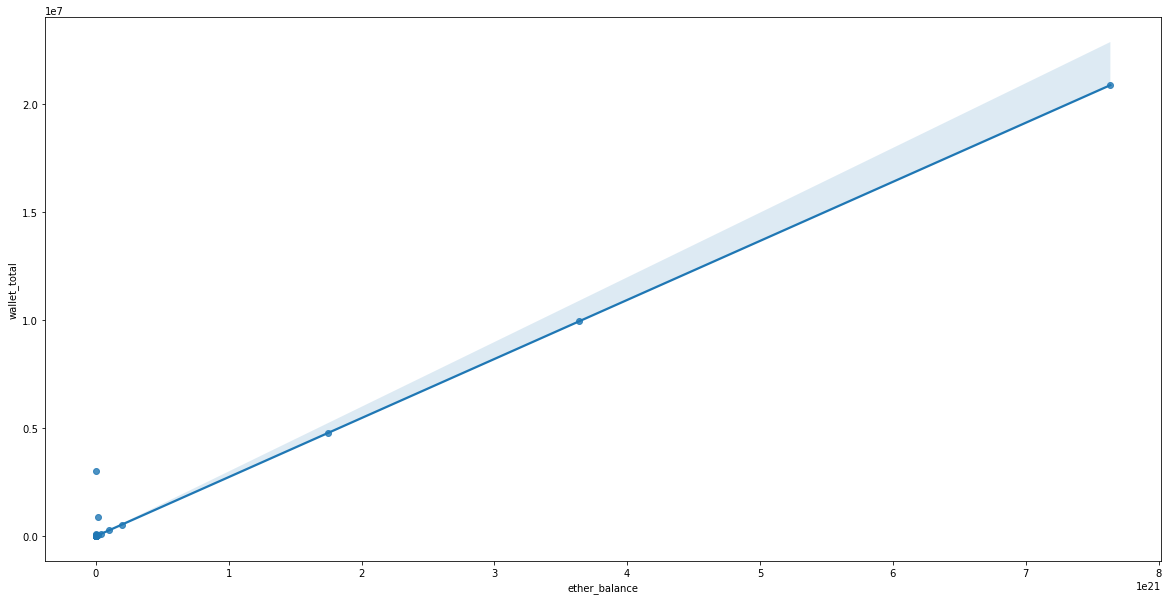

In [61]:
plt.figure(figsize=(20,10))
sns.regplot(x=ether_amount_vs_wallet_total_df["ether_balance"], y=ether_amount_vs_wallet_total_df["wallet_total"])
plt.show()

In [63]:
num_of_tokens_vs_wallet_total = []
for dao in mainnet_dao_data:
    cur_data_point = []
    number_of_tokens = 0
    for token in dao["token_info"]:
        if(float(token["balance"]) > 0):
            number_of_tokens+=1
            
    cur_data_point.append(number_of_tokens)
    cur_data_point.append(dao["wallet_total"])
    num_of_tokens_vs_wallet_total.append(cur_data_point)
    
num_of_tokens_vs_wallet_totals_df = pd.DataFrame(num_of_tokens_vs_wallet_total, columns=['num_of_tokens', 'wallet_total'])

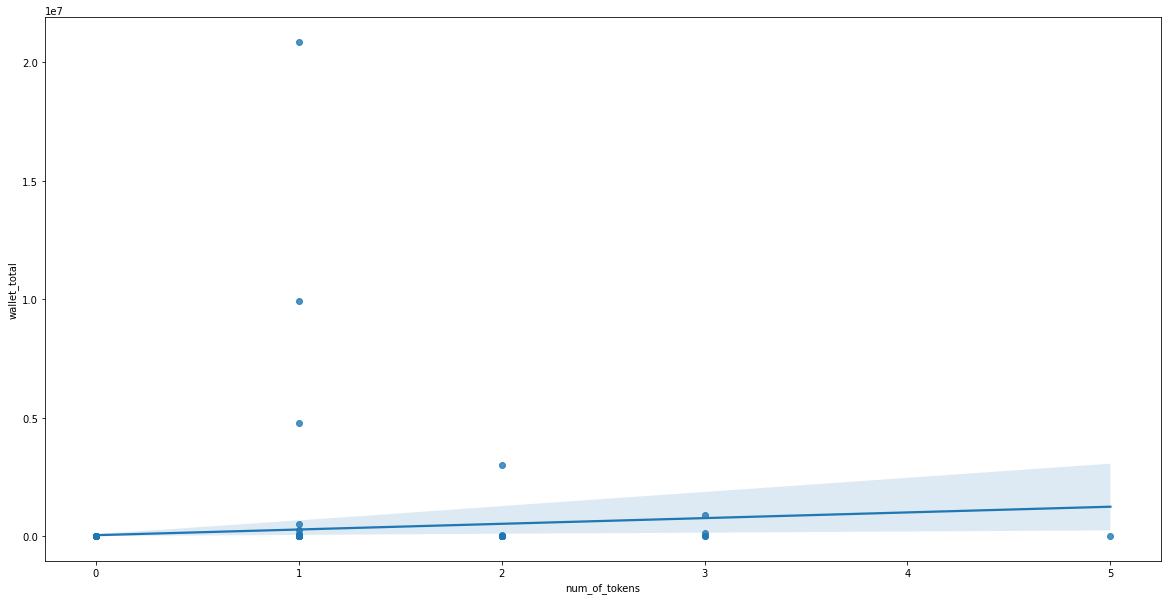

In [64]:
plt.figure(figsize=(20,10))
sns.regplot(x=num_of_tokens_vs_wallet_totals_df["num_of_tokens"], y=num_of_tokens_vs_wallet_totals_df["wallet_total"])
plt.show()

In [90]:
import psycopg2
import os
import json

database_dict = {
        "database": os.environ.get("POSTGRES_DB"),
        "user": os.environ.get("POSTGRES_USERNAME"),
        "password": os.environ.get("POSTGRES_PASSWORD"),
        "host": os.environ.get("POSTGRES_WRITER"),
        "port": os.environ.get("POSTGRES_PORT"),
    }
engine = psycopg2.connect(**database_dict)
cur = engine.cursor()

def get_all_proposals(cur, engine):
    execute_string = f"SELECT * FROM daohaus.proposal"
    cur.execute(execute_string)
    records = cur.fetchall()
    js = [];
    for record in records:
        js.append(record)
    return js

def get_all_mainnet_daos(cur, engine):
    execute_string = f"SELECT * FROM daohaus.dao"
    cur.execute(execute_string)
    records = cur.fetchall()
    js = {};
    for x in records:
        if(x[5] == 1):
            js[x[0]] = {"address":x[1], "num_of_proposals":0}
    return js

all_proposals = get_all_proposals(cur, engine)
all_main_net_daos_dict = get_all_mainnet_daos(cur, engine)

In [85]:
proccessed_proposal_data = []
for proposal in all_proposals:
    cd = {}
    cd["proposal_id"] = proposal[0]
    cd["dao_id"] = proposal[35]
    proccessed_proposal_data.append(cd)

In [93]:
for proposal in proccessed_proposal_data:
    if proposal["dao_id"] in all_main_net_daos_dict:
        all_main_net_daos_dict[proposal["dao_id"]]["num_of_proposals"] += 1

In [95]:
dict_of_dao_addrees_to_wallet_total = {}
for dao in mainnet_dao_data:
    dict_of_dao_addrees_to_wallet_total[dao["address"]] = dao["wallet_total"]

In [99]:
num_proposals_vs_wallet_total_data = []
for token in all_main_net_daos_dict:
    cur_data_point = []
    cur_data_point.append(all_main_net_daos_dict[token]['num_of_proposals'])
    cur_data_point.append(dict_of_dao_addrees_to_wallet_total[all_main_net_daos_dict[token]['address']])
    num_proposals_vs_wallet_total_data.append(cur_data_point)
    
num_of_propsals_vs_wallet_totals_df = pd.DataFrame(num_proposals_vs_wallet_total_data, columns=['num_of_proposals', 'wallet_total'])

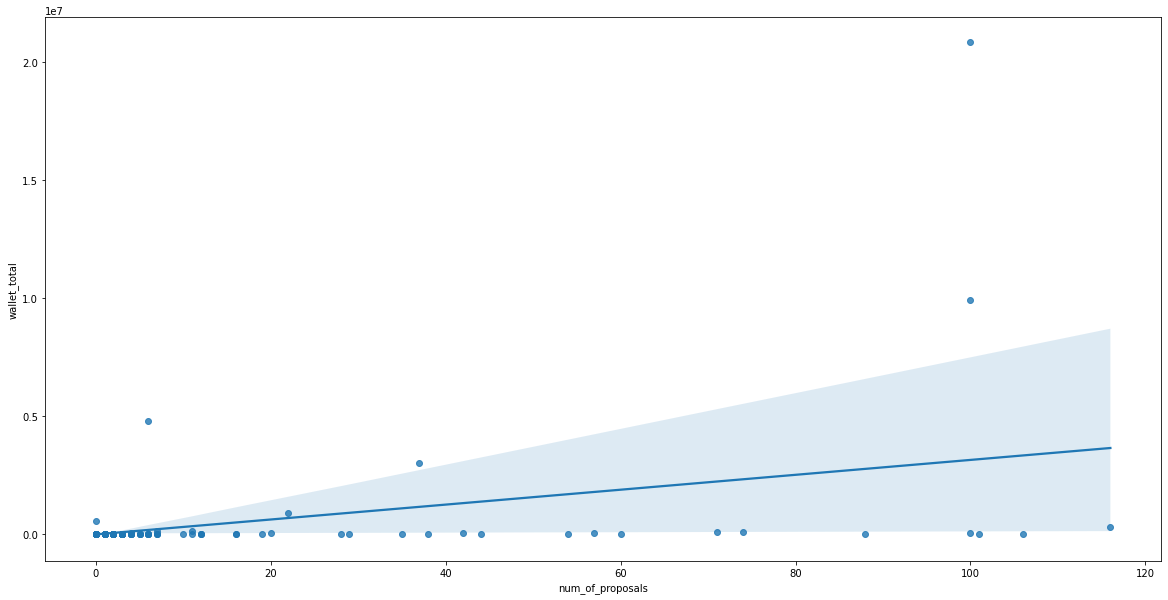

In [100]:
plt.figure(figsize=(20,10))
sns.regplot(x=num_of_propsals_vs_wallet_totals_df["num_of_proposals"], y=num_of_tokens_vs_wallet_totals_df["wallet_total"])
plt.show()